# Basic imports

In [1]:
import pandas as pd
import numpy as np

# Load datasets

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.drop("id",inplace=True, axis=1)
test_data.drop("id",inplace=True, axis=1)

train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
test_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


# Check for missing or duplicate data 

In [4]:
test_duplicates = test_data.duplicated().sum()
train_duplicates = train_data.duplicated().sum()
print(test_duplicates)
print(train_duplicates)

train_missing = train_data.isna().sum()
test_missing = test_data.isna().sum()
print(train_missing)
print(test_missing)

0
0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


# EDA

## Pie charts

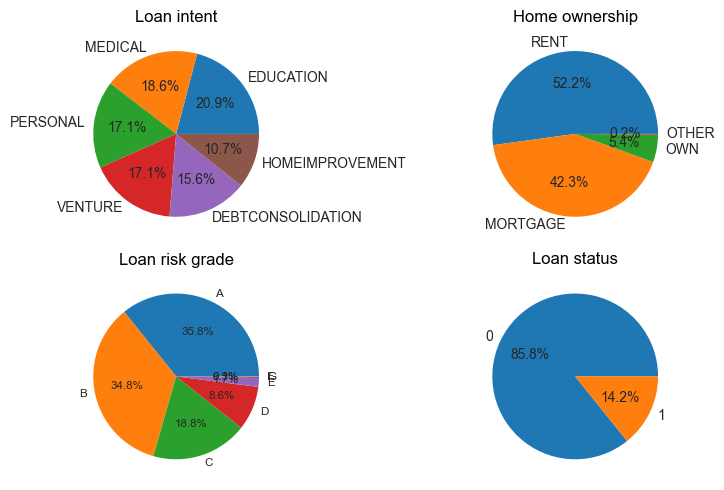

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,2, figsize=(8,5)) 
plt.style.use("seaborn-v0_8")
ax= ax.flatten()  
ax[0].set_title("Loan intent")
ax[0].pie(train_data["loan_intent"].value_counts(), labels=train_data["loan_intent"].value_counts().index, autopct="%1.1f%%")
ax[1].set_title("Home ownership")
ax[1].pie(train_data["person_home_ownership"].value_counts(), labels=train_data["person_home_ownership"].value_counts().index,  autopct="%1.1f%%")
ax[2].set_title("Loan risk grade")
ax[2].pie(train_data["loan_grade"].value_counts(), labels=train_data["loan_grade"].value_counts().index, textprops={'size': 'smaller'}, autopct="%1.1f%%")
ax[3].set_title("Loan status")
ax[3].pie(train_data["loan_status"].value_counts(), labels=train_data["loan_status"].value_counts().index, autopct="%1.1f%%")
plt.tight_layout()
plt.show()



## Distributions

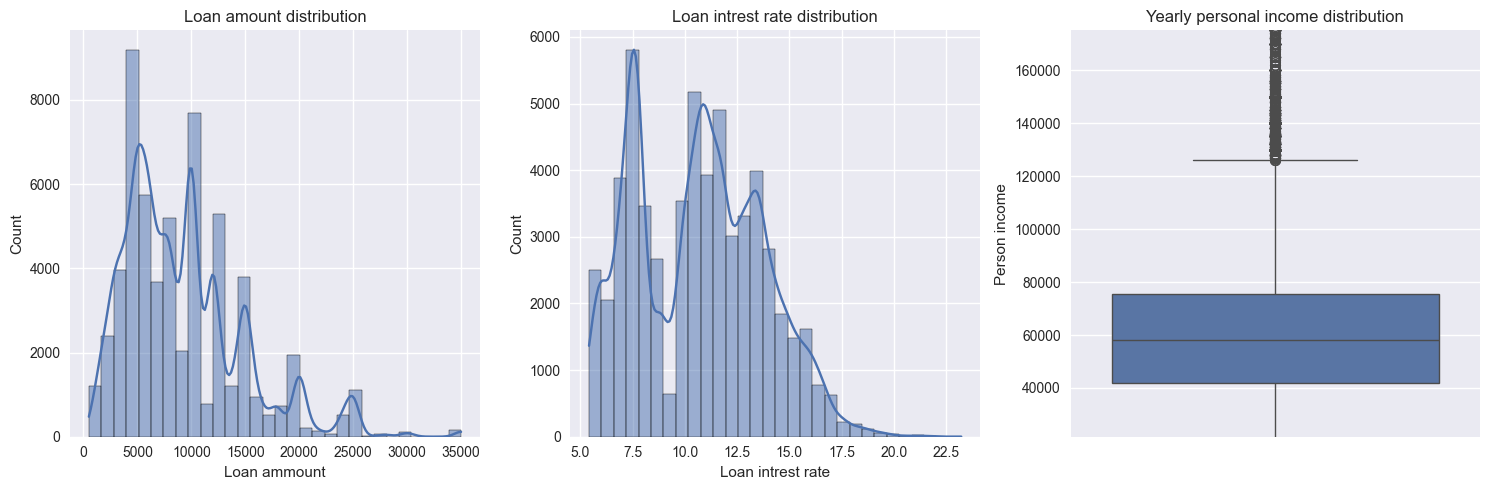

In [6]:

fig,ax = plt.subplots(1,3, figsize=(15,5))
plt.style.use("seaborn-v0_8")
ax= ax.flatten()  
ax[0].set_title("Loan amount distribution")
ax[0].set_xlabel("Loan ammount")
sns.histplot(train_data["loan_amnt"], kde=True, bins=30,ax=ax[0])
ax[1].set_title("Loan intrest rate distribution")
ax[1].set_xlabel("Loan intrest rate")
sns.histplot(train_data["loan_int_rate"], kde=True, bins=30,ax=ax[1])
ax[2].set_title("Yearly personal income distribution")
sns.boxplot(data=train_data, y=train_data["person_income"],ax=ax[2])
ax[2].set_ylim(train_data["person_income"].quantile(0.01),train_data["person_income"].quantile(0.99))
ax[2].set_ylabel("Person income")
plt.tight_layout()
plt.show()


## Obvious outliers

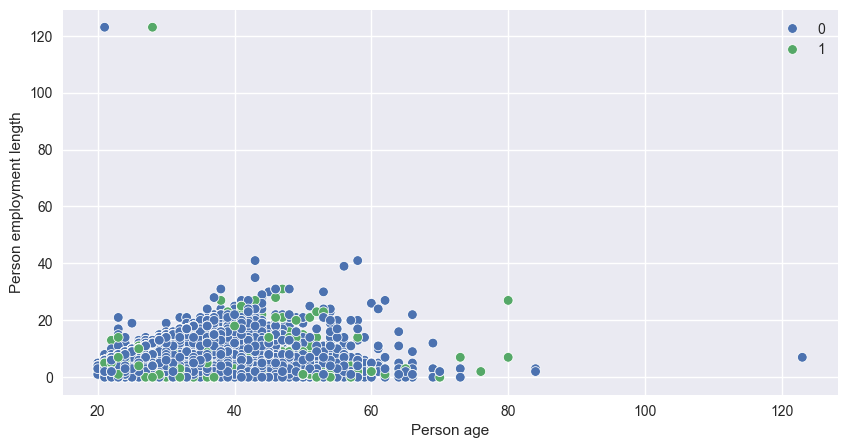

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=train_data, x="person_age",y="person_emp_length", hue="loan_status")
plt.xlabel("Person age")
plt.ylabel("Person employment length")
plt.legend()
plt.show()

In [8]:
train_data = train_data.drop(train_data[train_data["person_age"]>100].index)
train_data = train_data.drop(train_data[train_data["person_emp_length"]>100].index)
train_data = train_data.reset_index(drop=True)

# Data preprocessing

## Label encodings

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib 

lb = LabelEncoder()
train_data["loan_grade"] = lb.fit_transform(train_data["loan_grade"])
test_data["loan_grade"] = lb.fit_transform(test_data["loan_grade"])

#joblib.dump(lb, "lb_loan_grade.joblib")

mapped_grade = dict(zip(lb.classes_, range(len(lb.classes_))))

train_data["loan_intent"] = lb.fit_transform(train_data["loan_intent"])
test_data["loan_intent"] = lb.fit_transform(test_data["loan_intent"])

#joblib.dump(lb, "lb_loan_intent.joblib")

train_data["person_home_ownership"] = lb.fit_transform(train_data["person_home_ownership"])
test_data["person_home_ownership"] = lb.fit_transform(test_data["person_home_ownership"])

#joblib.dump(lb,"lb_home_owner.joblib")

train_data["cb_person_default_on_file"] = train_data["cb_person_default_on_file"].apply(lambda x: 1 if str(x).strip().upper()=='Y' else 0)
test_data["cb_person_default_on_file"] = test_data["cb_person_default_on_file"].apply(lambda x: 1 if str(x).strip().upper()=='Y' else 0)






## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

mapped_classes = {
                    "Not approved for loan" : 0,
                    "Approved for loan" : 1
}

sc = StandardScaler()
train_data[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]] = sc.fit_transform(train_data[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]])
test_data[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]] = sc.transform(test_data[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]])

#joblib.dump(sc,"scaler.joblib")

['scaler.joblib']

## Correlation matrix

<Axes: title={'center': 'Correlation heatmap'}>

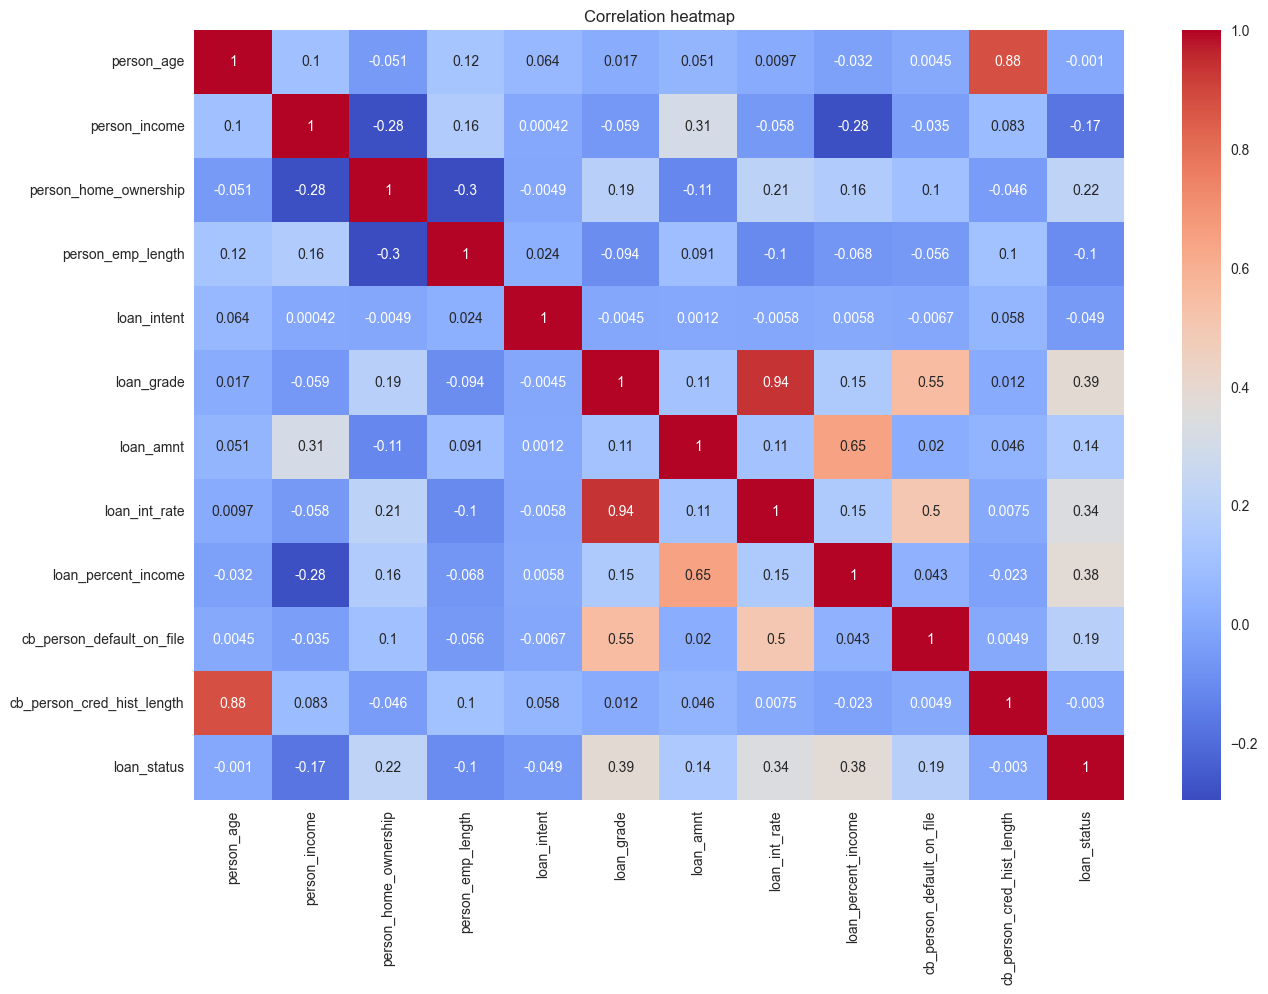

In [11]:
plt.figure(figsize=(15,10))
plt.title("Correlation heatmap")
sns.heatmap(data=train_data.corr(),annot=True, cmap="coolwarm")

# Metrics evaluetor

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, auc, roc_auc_score,roc_curve, ConfusionMatrixDisplay


def ROC_Curve_plot (y_test, y_pred_proba, modelName):
    fpr1, tpr1, tresholds =roc_curve(y_test,y_pred_proba[:,1])

    roc_auc1 = auc(fpr1,tpr1)


    plt.figure(figsize=(8,4))
    plt.style.use("default")
    plt.plot(fpr1,tpr1, color='red', lw=2, label=f"{modelName} (AUC ={roc_auc1:.4f})")
    plt.plot([0,1],[0,1], color='navy', linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

def Evaluate_metrics (y_test, y_pred, y_pred_proba, model,mapped_classes):
    if (y_pred_proba !=[]):
        roc_auc = roc_auc_score(y_test,y_pred_proba[:,1])
        score = f"ROC AUC Score: {roc_auc}"

    else:
        score=""

    accuracy = accuracy_score(y_test,y_pred)
    class_report = classification_report(y_test,y_pred, labels=model.classes_)
    cm =confusion_matrix(y_test,y_pred)

    plt.figure(figsize=(8,5))
    plt.style.use("default")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mapped_classes.keys())
    disp.plot(values_format="d")

    print(score)
    print(f"Accuracy score:{accuracy}")
    print(f"Class report:{class_report}")

# Model selection

## Train test spit

In [13]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns="loan_status")
y = train_data["loan_status"]

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(46913, 11) (11729, 11) (46913,) (11729,)


## Logistic regression

ROC AUC Score: 0.8798587449037919
Accuracy score:0.8954727598260721
Class report:              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10096
           1       0.71      0.42      0.53      1633

    accuracy                           0.90     11729
   macro avg       0.81      0.70      0.74     11729
weighted avg       0.88      0.90      0.88     11729



C:\Users\Dogo\AppData\Local\Temp\ipykernel_78284\4199205388.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (y_pred_proba !=[]):


<Figure size 800x500 with 0 Axes>

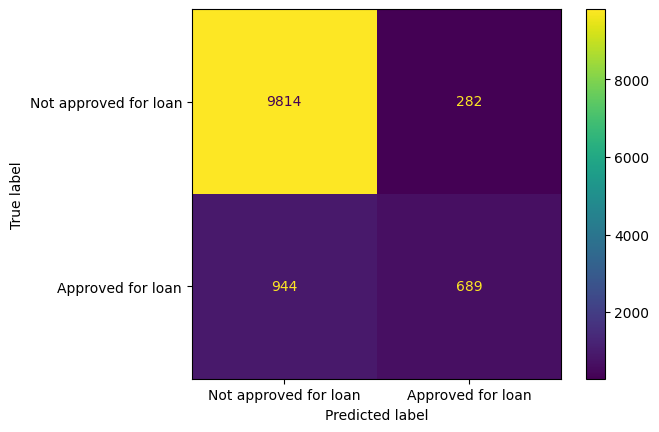

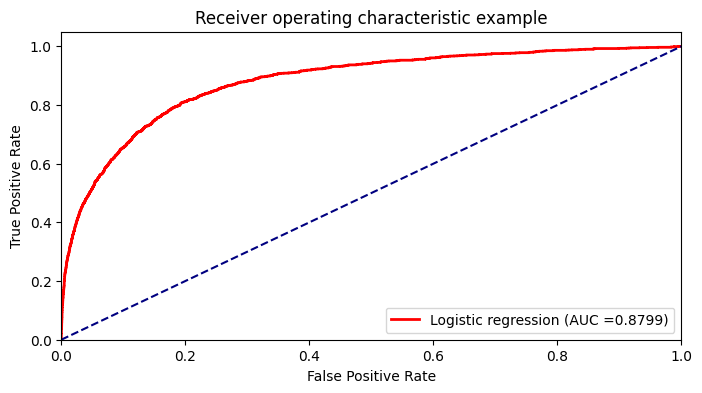

In [14]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(random_state=42)

logReg.fit(X_train,y_train)
y_pred_proba = logReg.predict_proba(X_test)
y_pred = logReg.predict(X_test)

Evaluate_metrics(y_test,y_pred,y_pred_proba,logReg,mapped_classes)
ROC_Curve_plot(y_test,y_pred_proba,"Logistic regression")

## Random forest

ROC AUC Score: 0.9422021344632253
Accuracy score:0.9491857788387756
Class report:              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10096
           1       0.92      0.69      0.79      1633

    accuracy                           0.95     11729
   macro avg       0.94      0.84      0.88     11729
weighted avg       0.95      0.95      0.95     11729



C:\Users\Dogo\AppData\Local\Temp\ipykernel_78284\4199205388.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (y_pred_proba !=[]):


<Figure size 800x500 with 0 Axes>

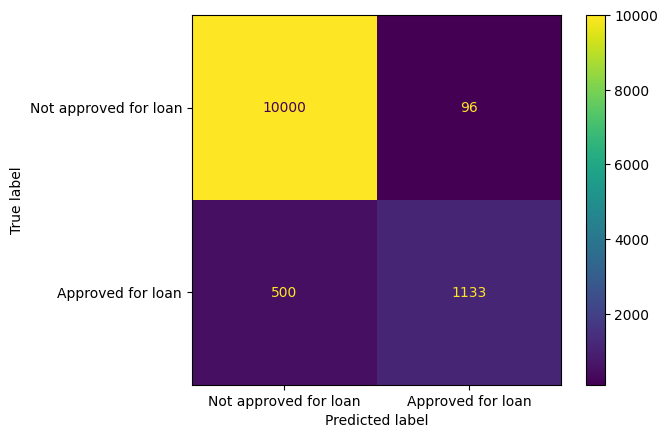

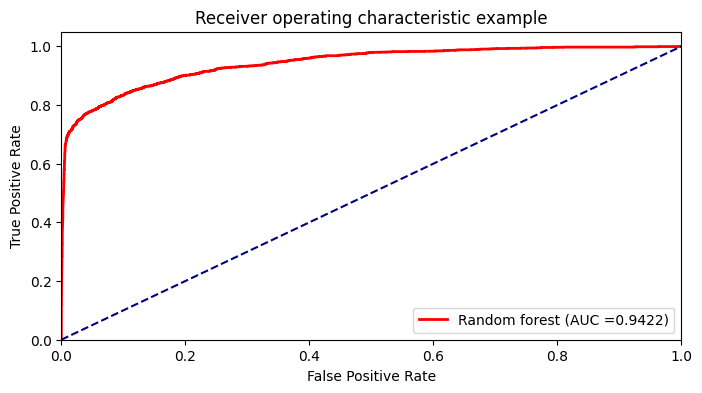

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier (random_state=42, n_estimators=200, max_depth=20,)

RF.fit(X_train,y_train)
y_pred_proba = RF.predict_proba(X_test)
y_pred = RF.predict(X_test)

Evaluate_metrics(y_test,y_pred,y_pred_proba,logReg,mapped_classes)
ROC_Curve_plot(y_test,y_pred_proba,"Random forest")

## Extreme gradient booster

C:\Users\Dogo\AppData\Local\Temp\ipykernel_78284\4199205388.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (y_pred_proba !=[]):


ROC AUC Score: 0.9539525879177775
Accuracy score:0.9506351777645153
Class report:              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10096
           1       0.90      0.73      0.80      1633

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



<Figure size 800x500 with 0 Axes>

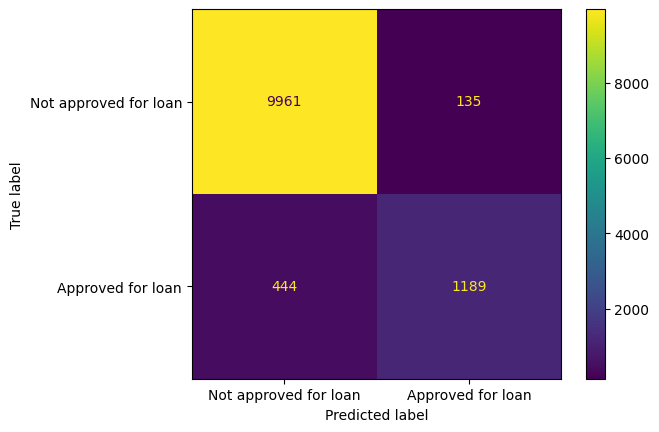

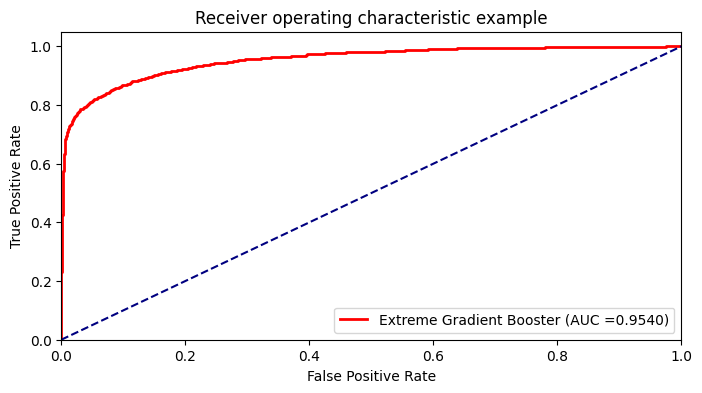

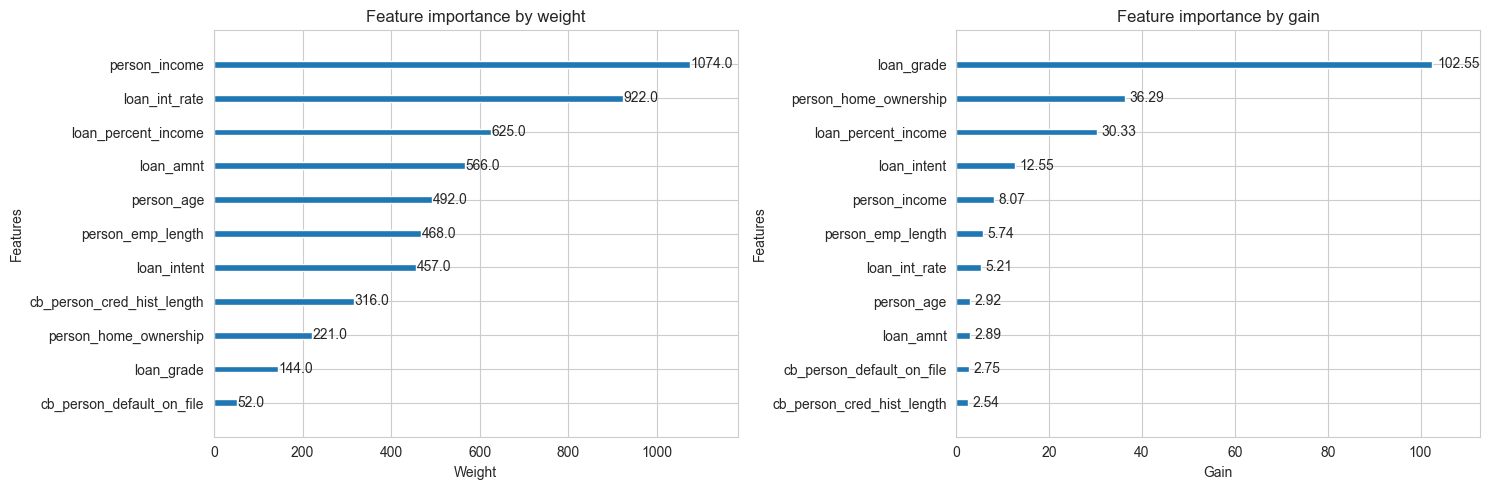

['Loan_Xgb.joblib']

In [ ]:
from xgboost import XGBClassifier
import xgboost

xg = XGBClassifier(random_state=42, objective="binary:logistic", n_estimators=300, max_depth=5, verbosity=2, subsample =0.8, learning_rate=0.065)

xg.fit(X_train,y_train)
y_pred_proba = xg.predict_proba(X_test)
y_pred = xg.predict(X_test)

Evaluate_metrics(y_test,y_pred,y_pred_proba,logReg,mapped_classes)
ROC_Curve_plot(y_test,y_pred_proba,"Extreme Gradient Booster")

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,2, figsize=(15,5))
xgboost.plot_importance(xg, importance_type="weight", ax=ax[0], title="Feature importance by weight", values_format="{v:.1f}")
ax[0].set_xlabel('Weight')

xgboost.plot_importance(xg, importance_type="gain",ax=ax[1], title="Feature importance by gain",values_format="{v:.2f}")
ax[1].set_xlabel('Gain')

plt.tight_layout()
plt.show()

#joblib.dump(xg,"Loan_Xgb.joblib")

# Model selection for determining loan grade

In [17]:
X = train_data.drop(columns=["loan_grade","loan_status"])
y = train_data["loan_grade"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.35, random_state=42)



## Extreme gradient booster


Accuracy score:0.9566869671132765
Class report:              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7396
           1       0.97      0.98      0.98      7132
           2       0.95      0.92      0.94      3862
           3       0.81      0.88      0.85      1729
           4       0.68      0.43      0.53       340
           5       0.40      0.08      0.13        53
           6       0.50      0.08      0.13        13

    accuracy                           0.96     20525
   macro avg       0.76      0.62      0.65     20525
weighted avg       0.95      0.96      0.95     20525



['Loan_grade_XGB.joblib']

<Figure size 800x500 with 0 Axes>

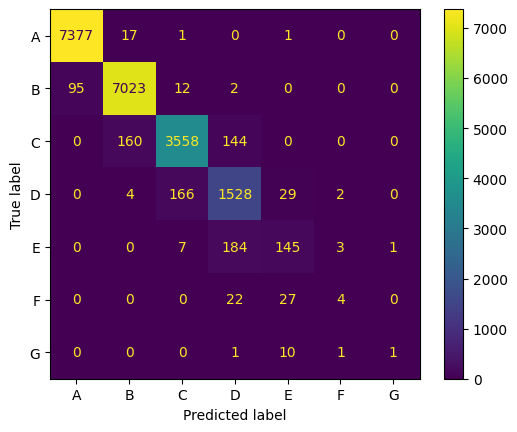

In [ ]:
xg = XGBClassifier(n_estimators=300,  objective="multi:softprob", eval_metric="pre", max_depth =5, subsample=0.9, colsample_bytree=0.9, learning_rate=0.01, random_state=42)

xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

Evaluate_metrics(y_test,y_pred,[],xg,mapped_grade)

#joblib.dump(xg, "Loan_grade_XGB.joblib")

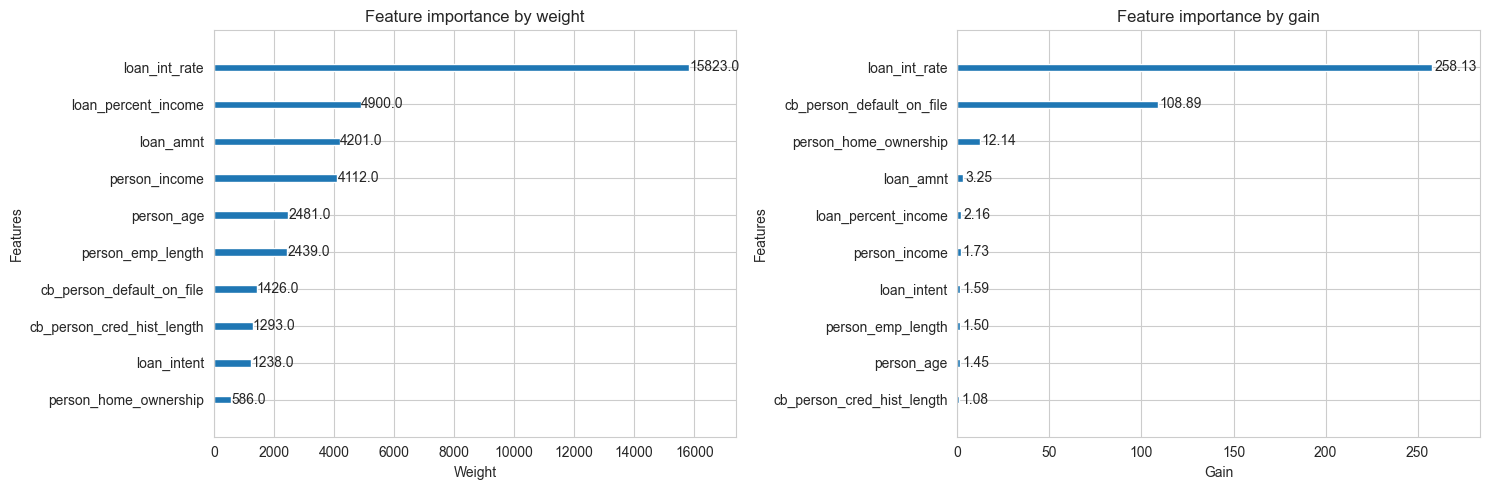

In [19]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,2, figsize=(15,5))
xgboost.plot_importance(xg, importance_type="weight", ax=ax[0], title="Feature importance by weight", values_format="{v:.1f}")
ax[0].set_xlabel('Weight')

xgboost.plot_importance(xg, importance_type="gain",ax=ax[1], title="Feature importance by gain",values_format="{v:.2f}")
ax[1].set_xlabel('Gain')

plt.tight_layout()
plt.show()


Accuracy score:0.9514250913520097
Class report:              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7396
           1       0.96      0.99      0.98      7132
           2       0.96      0.90      0.93      3862
           3       0.78      0.90      0.84      1729
           4       0.63      0.39      0.48       340
           5       0.25      0.02      0.04        53
           6       1.00      0.08      0.14        13

    accuracy                           0.95     20525
   macro avg       0.80      0.61      0.63     20525
weighted avg       0.95      0.95      0.95     20525



<Figure size 800x500 with 0 Axes>

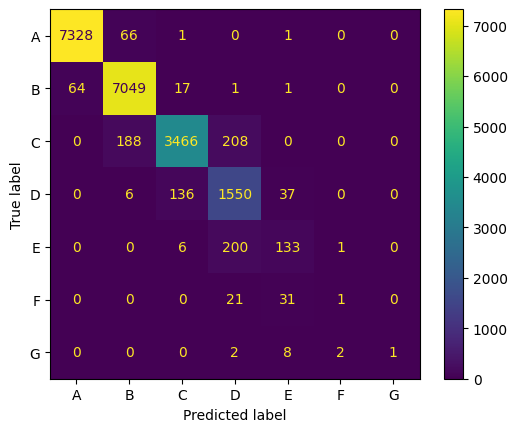

In [20]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

Evaluate_metrics(y_test,y_pred,[],RF,mapped_grade)